In [1]:
import os
import pandas as pd
import numpy as np

path = os.getcwd()
df_entities_spacy = pd.read_csv(os.path.join(path, "df_entities_spacy_processed.csv"))
df_entities_stanza = pd.read_csv(os.path.join(path, "df_entities_stanza_processed.csv"))

df_results = pd.read_csv("results_ner_comparison.csv")

## Overall Results

In [2]:
df_results.head(20)
# each index represents the results for one specific bio and
# not applicable means that there were no examples of the entity in entities output by either package for that specific biography
# those not applicable cells will be replaced by mean values

,subject,category,percent_partial_or_total_agreement_span,total_agreement_per,partial_agreement_per,total_ner_aggregate,CARDINAL,DATE,EVENT,FAC,...,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART
0,Aage Bohr,Physics,0.83,0.74,0.09,0.81,0.86,0.98,Not applicable,0.67,...,1.0,1.0,1.0,0.76,Not applicable,0.79,0.0,Not applicable,1.0,0.58
1,Aaron Klug,Chemistry,0.81,0.69,0.12,0.78,1.0,1.00,Not applicable,0.0,...,Not applicable,0.71,Not applicable,0.7,Not applicable,0.76,Not applicable,Not applicable,Not applicable,0.43
2,Adolf Friedrich Johann Butenandt,Chemistry,0.06,0.06,0.01,1.00,Not applicable,1.00,1.0,Not applicable,...,Not applicable,1.0,1.0,1.0,Not applicable,1.0,Not applicable,Not applicable,Not applicable,1.0
3,Adolf Otto Reinhold Windaus,Chemistry,0.20,0.18,0.02,0.86,1.0,1.00,0.0,Not applicable,...,Not applicable,1.0,Not applicable,0.86,Not applicable,0.8,Not applicable,Not applicable,Not applicable,0.86
4,Adolf von Baeyer,Chemistry,0.10,0.08,0.01,0.83,0.67,0.92,Not applicable,Not applicable,...,Not applicable,0.92,Not applicable,0.57,Not applicable,0.8,Not applicable,Not applicable,Not applicable,1.0
5,Albert A. Michelson,Physics,0.82,0.69,0.13,0.80,0.7,0.97,0.5,0.43,...,Not applicable,1.0,1.0,0.74,Not applicable,0.84,0.0,0.76,Not applicable,0.43
6,Albert Einstein,Physics,0.85,0.74,0.11,0.85,0.9,0.98,0.88,0.25,...,0.67,0.9,0.97,0.72,Not applicable,0.86,0.0,Not applicable,1.0,0.65
7,Alexander Prokhorov,Physics,0.08,0.07,0.01,0.91,0.0,1.00,1.0,0.5,...,Not applicable,1.0,Not applicable,0.67,Not applicable,0.94,Not applicable,1.0,Not applicable,1.0
8,Alfred Kastler,Physics,0.79,0.71,0.07,0.84,0.8,0.95,Not applicable,0.44,...,Not applicable,0.89,1.0,0.75,Not applicable,0.88,Not applicable,Not applicable,Not applicable,0.57
9,Alfred Werner,Chemistry,0.83,0.77,0.07,0.94,1.0,1.00,Not applicable,0.0,...,Not applicable,0.86,1.0,0.84,Not applicable,0.88,Not applicable,Not applicable,Not applicable,1.0


#### Replacing Not applicable with the mean of the column

In [3]:
df_results.replace("Not applicable", None, inplace=True)

In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")
tags = list(nlp.get_pipe('ner').labels)

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# for each tag, compute the mean of the series without taking into account the null
means = {col: round((np.mean(df_results[df_results[col].notnull()][col].astype(float))), 2) for col in tags}

In [6]:
# using the dictionary of means per column to replace null values
for col in tags:
    df_results[col].fillna(means[col], inplace=True)

In [7]:
df_results.head()

,subject,category,percent_partial_or_total_agreement_span,total_agreement_per,partial_agreement_per,total_ner_aggregate,CARDINAL,DATE,EVENT,FAC,...,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART
0,Aage Bohr,Physics,0.83,0.74,0.09,0.81,0.86,0.98,0.72,0.67,...,1.0,1.0,1.0,0.76,0.76,0.79,0.0,0.59,1.0,0.58
1,Aaron Klug,Chemistry,0.81,0.69,0.12,0.78,1.0,1.00,0.72,0.0,...,0.74,0.71,0.96,0.7,0.76,0.76,0.07,0.59,0.66,0.43
2,Adolf Friedrich Johann Butenandt,Chemistry,0.06,0.06,0.01,1.00,0.86,1.00,1.0,0.25,...,0.74,1.0,1.0,1.0,0.76,1.0,0.07,0.59,0.66,1.0
3,Adolf Otto Reinhold Windaus,Chemistry,0.20,0.18,0.02,0.86,1.0,1.00,0.0,0.25,...,0.74,1.0,0.96,0.86,0.76,0.8,0.07,0.59,0.66,0.86
4,Adolf von Baeyer,Chemistry,0.10,0.08,0.01,0.83,0.67,0.92,0.72,0.25,...,0.74,0.92,0.96,0.57,0.76,0.8,0.07,0.59,0.66,1.0


In [8]:
text_agreement_by_cat = df_results.pivot_table(index="category", values=["percent_partial_or_total_agreement_span",	"total_agreement_per",	"partial_agreement_per"])
# we can observe a slightly higher rate of agreement in the Chemistry category
text_agreement_by_cat

,partial_agreement_per,percent_partial_or_total_agreement_span,total_agreement_per
category,,,
Chemistry,0.0824,0.7013,0.6185
Physics,0.0954,0.7105,0.6153


In [9]:
df_results[tags] = df_results[tags].astype(float)
agreement_by_cat_per_label = df_results.pivot_table(index="category", values=tags + ["total_ner_aggregate"])
# looking at the agreement per entity label, there does not seem to be a big difference between both categories either, 
# they perform on a similar level for the vast majority of them
agreement_by_cat_per_label

,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,total_ner_aggregate
category,,,,,,,,,,,,,,,,,,,
Chemistry,0.8844,0.9713,0.7523,0.2718,0.8037,0.5354,0.1957,0.3767,0.7403,0.8503,0.9575,0.7501,0.7549,0.8063,0.0767,0.6122,0.6584,0.6686,0.8372
Physics,0.8378,0.9734,0.6829,0.2322,0.7564,0.5659,0.2020,0.4061,0.7386,0.8067,0.9622,0.7153,0.7646,0.7879,0.0608,0.5653,0.6615,0.6076,0.8044


### Visualizations

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

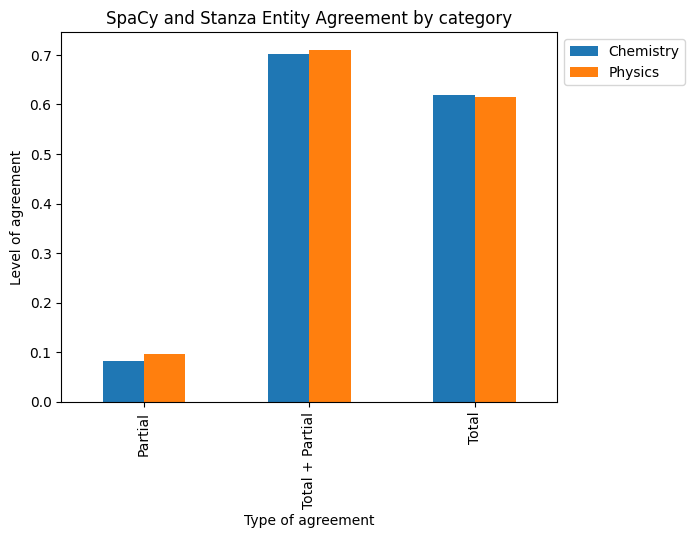

In [11]:
text_agreement_by_cat.T.plot(kind="bar")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.title("SpaCy and Stanza Entity Agreement by category")
plt.xticks(ticks=[0, 1, 2], labels=["Partial", "Total + Partial", "Total"])
plt.xlabel("Type of agreement")
plt.ylabel("Level of agreement")
plt.show()

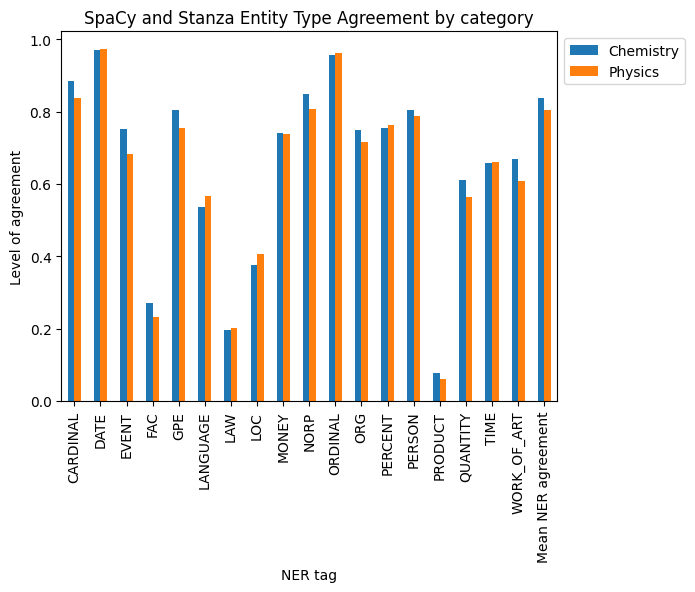

In [12]:
agreement_by_cat_per_label.T.plot(kind="bar")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.title("SpaCy and Stanza Entity Type Agreement by category")
plt.xticks(ticks= range(len(tags)+1), labels=tags + ["Mean NER agreement"])
plt.xlabel("NER tag")
plt.ylabel("Level of agreement")
plt.show()

## Agreggate Results regardless of package

In [13]:
# getting aggregate results for the ner entities regardless of category
agg_results = []

for col in list(df_results.columns)[2:]:
    
    data = df_results[col].astype(float) #change dtype to float 
    mean = round(np.mean(data), 2)
    std = round(np.std(data), 2)
    min = round(np.min(data), 2)
    max = round(np.max(data), 2)
    
    # print(f"METRICS FOR :{col}")
    # print(f"Mean:{mean}")
    # print(f"Std:{std}")
    # print(f"Min:{min}")
    # print(f"Max:{max}")
    
    dict_data = {"metric":col,
                 "mean": mean,
                 "std": std,
                 "min": min, 
                 "max": max}
    agg_results.append(dict_data)

In [14]:
df_agg = pd.DataFrame(agg_results)

In [15]:
# more agreement and more stable performance
df_agg[["metric", "mean", "std"]].sort_values("mean", ascending=False)

,metric,mean,std
5,DATE,0.97,0.04
14,ORDINAL,0.96,0.12
4,CARDINAL,0.86,0.16
13,NORP,0.83,0.19
3,total_ner_aggregate,0.82,0.08
17,PERSON,0.80,0.13
8,GPE,0.78,0.16
16,PERCENT,0.76,0.13
12,MONEY,0.74,0.17
15,ORG,0.73,0.14


In [26]:
spacy.explain("CARDINAL")

'Numerals that do not fall under another type'

### Overall agreement

In [16]:
df_agg_overall = df_agg[(~df_agg["metric"].isin(tags)) & (df_agg["metric"] != "total_ner_aggregate")]

In [17]:
df_agg_overall.head()
# regardless of category, both packages fully agree 62% of the time 
# and partially agree 71% of the time

,metric,mean,std,min,max
0,percent_partial_or_total_agreement_span,0.71,0.25,0.01,0.96
1,total_agreement_per,0.62,0.23,0.01,0.89
2,partial_agreement_per,0.09,0.04,0.00,0.18


Visualization

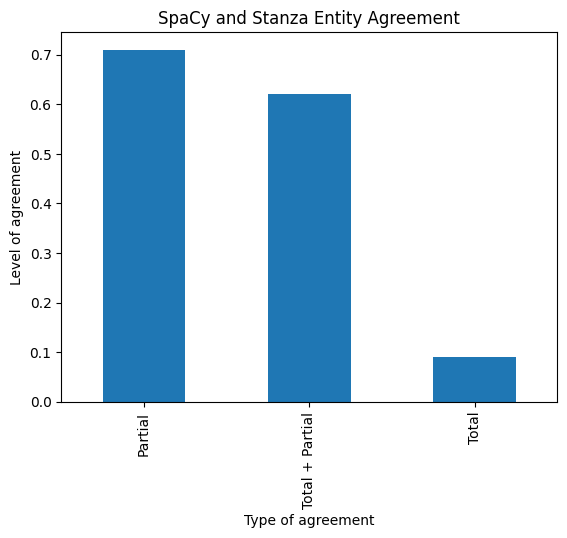

In [18]:
df_agg_overall["mean"].plot(kind="bar")
plt.title("SpaCy and Stanza Entity Agreement")
plt.xticks(ticks=range(3), labels=["Partial", "Total + Partial", "Total"])
plt.xlabel("Type of agreement")
plt.ylabel("Level of agreement")
plt.show()

### Tag agreement

In [19]:
df_agg_tags = df_agg[(df_agg["metric"].isin(tags)) | (df_agg["metric"] == "total_ner_aggregate")]

Visualization

In [20]:
df_agg_tags.sort_values("mean", ascending=False)
# the agreement overall is high 
# the packages agree the vast majority of times for the DATE, ORDINAL and CARDINAL labels
# and disagree almost fully when it comes to the PRODUCT label

,metric,mean,std,min,max
5,DATE,0.97,0.04,0.50,1.0
14,ORDINAL,0.96,0.12,0.00,1.0
4,CARDINAL,0.86,0.16,0.00,1.0
13,NORP,0.83,0.19,0.00,1.0
3,total_ner_aggregate,0.82,0.08,0.47,1.0
17,PERSON,0.80,0.13,0.00,1.0
8,GPE,0.78,0.16,0.00,1.0
16,PERCENT,0.76,0.13,0.00,1.0
12,MONEY,0.74,0.17,0.00,1.0
15,ORG,0.73,0.14,0.00,1.0


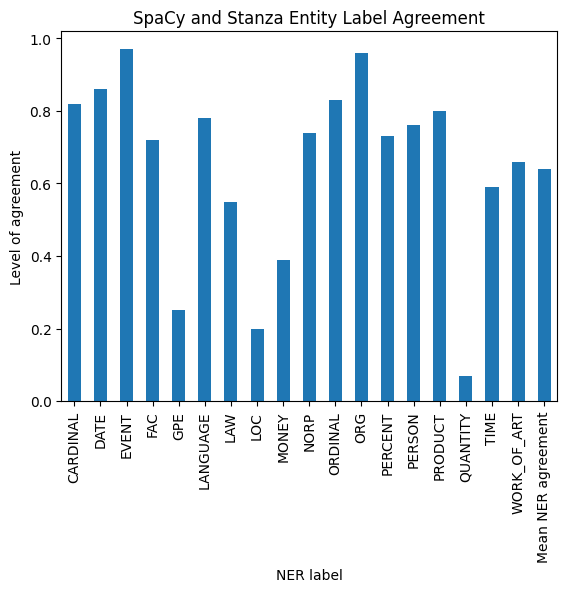

In [21]:
df_agg_tags["mean"].plot(kind="bar")
plt.title("SpaCy and Stanza Entity Label Agreement")
plt.xticks(ticks= range(len(tags)+1), labels=tags + ["Mean NER agreement"])
plt.xlabel("NER label")
plt.ylabel("Level of agreement")
plt.show()